# **Clean and Analyze Employee Exit Surveys**

**Summary**

---



In this project, I'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

I'll try to answer the following questions:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [ ]:
#read in the data
import numpy as np
import pandas as pd
dete_survey=pd.read_csv('dete_survey.csv')
tafe_survey=pd.read_csv('tafe_survey.csv')


In [ ]:
#quick exploration of the data
print(dete_survey.head())
print(dete_survey.info())

   ID                    SeparationType Cease Date  ... South Sea Disability NESB
0   1             Ill Health Retirement    08/2012  ...       NaN        NaN  Yes
1   2  Voluntary Early Retirement (VER)    08/2012  ...       NaN        NaN  NaN
2   3  Voluntary Early Retirement (VER)    05/2012  ...       NaN        NaN  NaN
3   4         Resignation-Other reasons    05/2012  ...       NaN        NaN  NaN
4   5                    Age Retirement    05/2012  ...       NaN        NaN  NaN

[5 rows x 56 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null 

In [ ]:
#quick exploration of the data
print(tafe_survey.head())
print(tafe_survey.info())

      Record ID  ... LengthofServiceCurrent. Length of Service at current workplace (in years)
0  6.341330e+17  ...                                                1-2                       
1  6.341337e+17  ...                                                NaN                       
2  6.341388e+17  ...                                                NaN                       
3  6.341399e+17  ...                                                NaN                       
4  6.341466e+17  ...                                                3-4                       

[5 rows x 72 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                       

Here are my observations about these two datasets
* The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
* Both the dete_survey and tafe_survey contain many columns that we don't need to complete our analysis.
* Each dataframe contains many of the same columns, but the column names are different.
* There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.


In [ ]:
#reding data again, but this time read 'Not Stated' values as NaN
dete_survey=pd.read_csv('dete_survey.csv', na_values='Not Stated')
#drop unnecessary columns
dete_survey_updated=dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated=tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [ ]:
#check dropped columns
print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)


Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact

In [ ]:
#standardizing column names
dete_survey_updated.columns=dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')
mapping={'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated=tafe_survey_updated.rename(mapping,axis=1)

In [ ]:
#check updated column names
print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')
Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employmen

For this project, we'll only analyze survey respondents who resigned, so we'll only select separation types containing the string 'Resignation'

In [ ]:
# Check the unique values for the separationtype column
print(dete_survey_updated['separationtype'].value_counts())
print(tafe_survey_updated['separationtype'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [ ]:
# Select only the resignation separation types from each dataframe
dete_survey_updated['separationtype']=dete_survey_updated['separationtype'].str.split('-').str[0]
dete_resignations=dete_survey_updated[dete_survey_updated['separationtype']=='Resignation'].copy()
tafe_resignations=tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation'].copy()

**Verify the data**

Below, we clean and explore the cease_date and dete_start_date columns to make sure all of the years make sense. We'll use the following criteria:

* Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
* Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

In [ ]:
#check the unique values
dete_resignations['cease_date'].value_counts()


2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
09/2010      1
2010         1
07/2006      1
Name: cease_date, dtype: int64

In [ ]:
#extract the years and convert them to a float type
dete_resignations['cease_date']=dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date']=dete_resignations['cease_date'].astype("float")

In [ ]:
print(dete_resignations['cease_date'].value_counts())
print(dete_resignations['dete_start_date'].value_counts())     

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64
2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64


In [ ]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

Below are our findings:

The years in both dataframes don't completely align. The tafe_survey_updated dataframe contains some cease dates in 2009, but the dete_survey_updated dataframe does not. The tafe_survey_updated dataframe also contains many more cease dates in 2010 than the dete_survey_updaed dataframe. Since we aren't concerned with analyzing the results by year, we'll leave them as is.

**Create a New Column**

Since our end goal is to answer the question below, we need a column containing the length of time an employee spent in their workplace, or years of service, in both dataframes.

* End goal: Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?
The tafe_resignations dataframe already contains a "service" column, which we renamed to institute_service.

Below, we calculate the years of service in the dete_survey_updated dataframe by subtracting the dete_start_date from the cease_date and create a new column named institute_service.

In [ ]:
dete_resignations['institute_service']=dete_resignations['cease_date']-dete_resignations['dete_start_date']
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

**Identify Dissatisfied Employees**

Next, we'll identify any employees who resigned because they were dissatisfied. Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe:

1) tafe_survey_updated:
   * Contributing Factors. Dissatisfaction
   * Contributing Factors. Job Dissatisfaction

2)dafe_survey_updated:
   * job_dissatisfaction
   * dissatisfaction_with_the_department
   * physical_work_environment
   * lack_of_recognition
   * lack_of_job_security
   * work_location
   * employment_conditions
   * work_life_balance
   * workload


If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column. After our changes, the new dissatisfied column will contain just the following values:

**True:** indicates a person resigned because they were dissatisfied in some way

**False:** indicates a person resigned because of a reason other than dissatisfaction with the job

**NaN:** indicates the value is missing

In [ ]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())


-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [ ]:
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [ ]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

**Combining the Data**

Below, we'll add an institute column so that we can differentiate the data from each survey after we combine them. Then, we'll combine the dataframes and drop any remaining columns we don't need.

In [ ]:
dete_resignations_up['institute']='DETE'
tafe_resignations_up['institute']='TAFE'


In [ ]:
combined=pd.concat([dete_resignations_up,tafe_resignations_up],ignore_index=True)
#drop columns with less than 500 non null values
combined_updated=combined.dropna(thresh=500,axis=1)

**Clean the Service Column**

Next, we'll clean the institute_service column and categorize employees according to the following definitions:

* New: Less than 3 years in the workplace
* Experienced: 3-6 years in the workplace
* Established: 7-10 years in the workplace
* Veteran: 11 or more years in the workplace

Our analysis is based on this article, which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

In [ ]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
12.0                   6
22.0                   6
17.0                   6
14.0                   6
10.0                   6
18.0                   5
16.0                   5
23.0                   4
11.0                   4
24.0                   4
39.0                   3
32.0                   3
21.0                   3
19.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2
27.0                   1


In [ ]:
combined_updated['institute_service']=combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service']=combined_updated['institute_service'].astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
def map(val):
  if val>=11:
    return 'Veteran'
  elif 7<=val<10:
    return 'Established'
  elif 3<=val<6:
    return 'Experienced'
  elif pd.isnull(val):
    return np.nan
  else:
    return 'New'

combined_updated['service_cat']=combined_updated['institute_service'].apply(map)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


**Perform Some Initial Analysis**

Finally, we'll replace the missing values in the dissatisfied column with the most frequent value, False. Then, we'll calculate the percentage of employees who resigned due to dissatisfaction in each service_cat group and plot the results.

Note that since we still have additional missing values left to deal with, this is meant to be an initial introduction to the analysis, not the final analysis.

In [ ]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [ ]:
combined_updated['dissatisfied']=combined_updated['dissatisfied'].fillna(False)
combined_updated['dissatisfied'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


False    411
True     240
Name: dissatisfied, dtype: int64

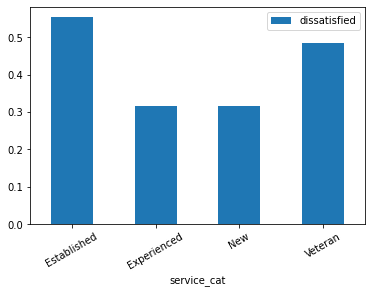

In [ ]:
#calculate the percentage of employees who resigned due to dissatisfaction in each category
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

#plot the results
%matplotlib inline
dis_pct.plot(kind='bar', rot=30)

From the initial analysis above, we can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service. However, we need to handle the rest of the missing data to finalize our analysis.